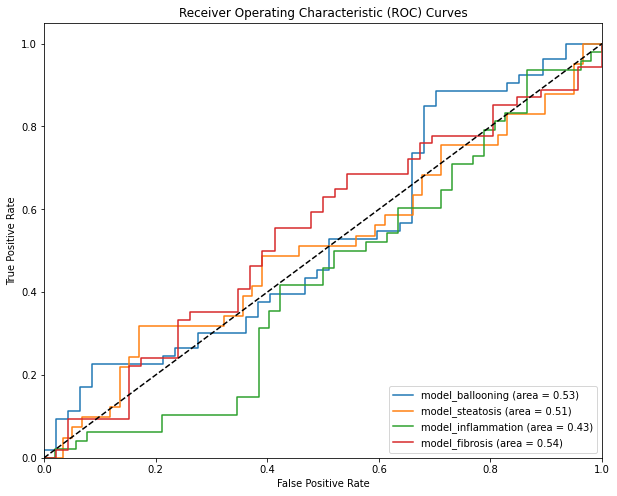

In [1]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dummy data - replace with your actual data loader
def load_data(model_name):
    # This function should return actual data and labels
    # For demonstration, it returns random predictions and true labels
    y_true = np.random.randint(0, 2, 100)
    y_pred = np.random.rand(100)
    return y_pred, y_true

# Names of the models
model_names = ['model_ballooning', 'model_steatosis', 'model_inflammation', 'model_fibrosis']
model_paths = ["D:/DATASET/Models/model_ballooning.h5", 'D:/DATASET/Models/model_steatosis.h5', 
               'D:/DATASET/Models/model_inflammation.h5', 'D:/DATASET/Models/model_fibrosis.h5']

# Prepare to plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each model
for model_name, model_path in zip(model_names, model_paths):
    # Load model - assume binary classification models saved in .h5
    model = load_model(model_path)
    
    # Load test data and labels specific to each model
    y_pred, y_true = load_data(model_name)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# ROC for individual models

In [2]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_model_roc_curve(y_true, y_scores, n_classes, model_name):
    if n_classes > 2:
        # Binarize the output labels for multi-class plotting
        y_true = label_binarize(y_true, classes=np.arange(n_classes))
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        # Calculate ROC and AUC for each class
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    else:
        # Handle binary classification directly
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()


In [3]:
# Example usage:
# Assume y_true and y_scores are loaded or computed elsewhere
# model_name = "Fibrosis"
# n_classes = 5  # Adjust according to your model's specifics
# plot_model_roc_curve(y_true, y_scores, n_classes, model_name)

Found 5349 images belonging to 5 classes.
168/168 [==============================] - 642s 4s/step


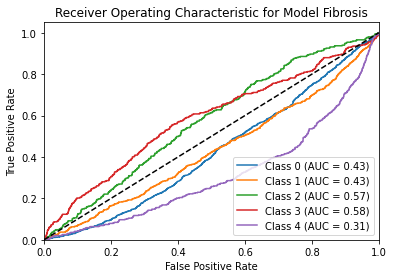

In [4]:
# Fibrosis
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load the fibrosis model
model_fib = load_model('D:/DATASET/Models/model_fibrosis.h5')

# Setup the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'D:/DATASET/CNN/fibrosis/train',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities for each class
predictions = model_fib.predict(test_generator, steps=len(test_generator))

# Since class_mode is 'categorical', test_generator.classes are indices, not one-hot
y_true = test_generator.classes  # Correctly assigned
n_classes = 5

# Binarize the output labels for multi-class plotting
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Model Fibrosis')
plt.legend(loc="lower right")
plt.show()

Found 5349 images belonging to 5 classes.
168/168 [==============================] - 668s 4s/step


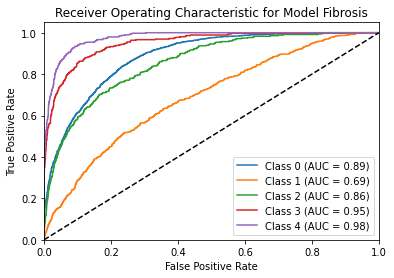

In [5]:
# Fibrosis updated
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load the fibrosis model
model_fib = load_model('D:/DATASET/Models/model_updated_fibrosis.h5')

# Setup the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'D:/DATASET/CNN/fibrosis/train',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities for each class
predictions = model_fib.predict(test_generator, steps=len(test_generator))

# Since class_mode is 'categorical', test_generator.classes are indices, not one-hot
y_true = test_generator.classes  # Correctly assigned
n_classes = 5

# Binarize the output labels for multi-class plotting
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Model Fibrosis')
plt.legend(loc="lower right")
plt.show()


Found 7973 images belonging to 2 classes.
250/250 [==============================] - 1062s 4s/step


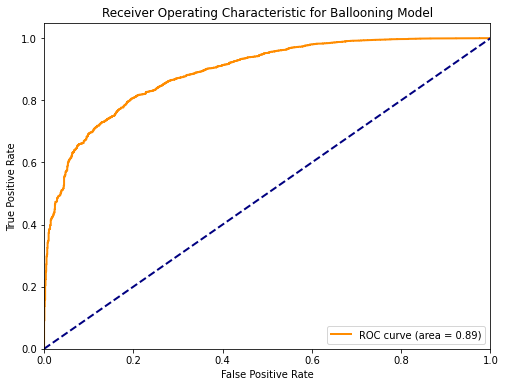

In [6]:
# Ballooning
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc

# Load the pre-trained model
model_balloon = load_model('D:/DATASET/Models/model_ballooning.h5')

# Setup the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'D:/DATASET/CNN/ballooning/train',  # Adjust path as necessary
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',  # Important for binary classification
    shuffle=False  # Maintain order to match labels and predictions
)

# Predict probabilities for the positive class
predictions = model_balloon.predict(test_generator, steps=len(test_generator))

# Get the actual labels
y_true = test_generator.classes  # Directly applicable for binary classification

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Ballooning Model')
plt.legend(loc="lower right")
plt.show()


In [1]:
# Steatosis
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load the steatosis model
model_fib = load_model('D:/DATASET/Models/model_steatosis.h5')

# Setup the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'D:/DATASET/CNN/steatosis/val',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities for each class
predictions = model_fib.predict(test_generator, steps=len(test_generator))

# Since class_mode is 'categorical', test_generator.classes are indices, not one-hot
y_true = test_generator.classes  # Correctly assigned
n_classes = 4

# Binarize the output labels for multi-class plotting
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Model Steatosis')
plt.legend(loc="lower right")
plt.show()


TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

Found 9732 images belonging to 3 classes.
305/305 [==============================] - 1196s 4s/step


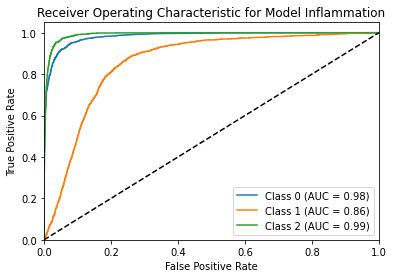

In [8]:
# Inflammation
# Steatosis
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load the steatosis model
model_fib = load_model('D:/DATASET/Models/model_inflammation.h5')

# Setup the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'D:/DATASET/CNN/inflammation/train',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities for each class
predictions = model_fib.predict(test_generator, steps=len(test_generator))

# Since class_mode is 'categorical', test_generator.classes are indices, not one-hot
y_true = test_generator.classes  # Correctly assigned
n_classes = 3

# Binarize the output labels for multi-class plotting
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Model Inflammation')
plt.legend(loc="lower right")
plt.show()
